# Module 2 : Wrap up Quizzzzzzz

Import des données :

In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [2]:
data

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [3]:
target

0          donated
1          donated
2          donated
3          donated
4      not donated
          ...     
743    not donated
744    not donated
745    not donated
746    not donated
747    not donated
Name: Class, Length: 748, dtype: object

In [6]:
target.value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

#### Question 1 : Select the correct answers from the following proposals.

 a) The problem to be solved is a regression problem  
 b) The problem to be solved is a binary classification problem (exactly 2 possible classes)  
 c) The problem to be solved is a multiclass classification problem (more than 2 possible classes)  
 d) The proportions of the class counts are imbalanced: some classes have more than twice as many rows than others)  
 

Je dirais : b) et d)

#### Question 2 : Using a sklearn.dummy.DummyClassifier and the strategy "most_frequent", what is the average of the accuracy scores obtained by performing a 10-fold cross-validation?

 a) ~25%  
 b) ~50%  
 c) ~75%

 Je dirais environ 75% en regardant le nombre d'occurences de "not donated", on va le faire qd mm pour la pratique.

In [19]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

model = DummyClassifier(strategy="most_frequent")
results = cross_validate(model, data, target, cv=10)
results["test_score"].mean()

0.762054054054054

#### Question 3 : Repeat the previous experiment but compute the balanced accuracy instead of the accuracy score. Pass scoring="balanced_accuracy" when calling cross_validate or cross_val_score functions?

 a) ~25%  
 b) ~50%  
 c) ~75%

In [20]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

model = DummyClassifier(strategy="most_frequent")
results = cross_validate(model, data, target, cv=10, scoring="balanced_accuracy")
results["test_score"].mean()

0.5

#### Question 4 : We will use a sklearn.neighbors.KNeighborsClassifier for the remainder of this quiz.

Why is it relevant to add a preprocessing step to scale the data using a StandardScaler when working with a KNeighborsClassifier?

 a) faster to compute the list of neighbors on scaled data  
 b) k-nearest neighbors is based on computing some distances. Features need to be normalized to contribute approximately equally to the distance computation.  
 c) This is irrelevant. One could use k-nearest neighbors without normalizing the dataset and get a very similar cross-validation score.

 Je dirais b)

#### Question 5 : Create a scikit-learn pipeline (using sklearn.pipeline.make_pipeline) where a StandardScaler will be used to scale the data followed by a KNeighborsClassifier. Use the default hyperparameters.

Inspect the parameters of the created pipeline. What is the value of K, the number of neighbors considered when predicting with the k-nearest neighbors?

 a) 1  
 b) 3  
 c) 5  
 d) 8  
 e) 10

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

model.get_params().keys()
model.get_params()["kneighborsclassifier__n_neighbors"]


5

#### Question 6 : Evaluate the previous model with a 10-fold cross-validation. Use the balanced accuracy as a score.
What can you say about this model? Compare the average of the train and test scores to argument your answer.

 a) The model clearly underfits  
 b) The model generalizes   
 c) The model clearly overfits

 D'après le calcul ci-dessous, je dirais que le modèle underfits.
 Réponse : et non, ça overfitte car : We see that the gap between train and test scores is large. In addition, the average score of on the training sets is good while the average scores on the testing sets is really bad. They are the signs of a overfitting model.




In [ ]:
from sklearn.model_selection import cross_validate

results = cross_validate(model, data, target, scoring="balanced_accuracy", cv=10, return_train_score=True)
results = pd.DataFrame(results)
print(results.mean())


#### Question 7 : We will now study the effect of the parameter n_neighbors on the train and test score using a validation curve. You can use the following parameter range:

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]  

Also, use a 5-fold cross-validation and compute the balanced accuracy score instead of the default accuracy score (check the scoring parameter). Finally, plot the average train and test scores for the different value of the hyperparameter. We recall that the name of the parameter can be found using model.get_params().

Select the true affirmations stated below:

 a) The model underfits for a range of n_neighbors values between 1 to 10  
 b) The model underfits for a range of n_neighbors values between 10 to 100  
 c) The model underfits for a range of n_neighbors values between 100 to 500

 D'après ci-dessous, je dirais la a) et b)
 Réponse : et ba non c'est la c) : Underfitting happens when the gap between train and test scores is low and that both scores are low. When n_neighbors is high, underfitting occurs. The model lacks expressivity because it always considers the majority class of a large number of data points. Its prediction tends to be always the same, irrespective of the test point of interest.



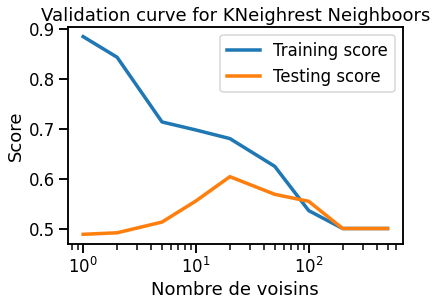

In [40]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
model.get_params()

results = cross_validate(model, data, target, cv=5, scoring="balanced_accuracy", )
train_scores, test_scores = validation_curve(model, data, target, param_name="kneighborsclassifier__n_neighbors", param_range=param_range, cv=5, scoring="balanced_accuracy", n_jobs=2)

plt.plot(param_range, train_scores.mean(axis=1), label="Training score")
plt.plot(param_range, test_scores.mean(axis=1), label="Testing score")
plt.legend()

plt.xscale("log")
plt.xlabel("Nombre de voisins")
plt.ylabel("Score")
_ = plt.title("Validation curve for KNeighrest Neighboors")


REPONSE :


Text(0.5, 1.0, 'Validation curve of K-nearest neighbors')

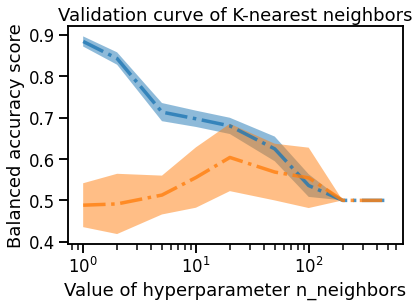

In [37]:
print("REPONSE :")

from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
param_name = "kneighborsclassifier__n_neighbors"
train_scores, test_scores = validation_curve(
    model, data, target, param_name=param_name, param_range=param_range, cv=5,
    n_jobs=2, scoring="balanced_accuracy")

_, ax = plt.subplots()
for name, scores in zip(
    ["Training score", "Testing score"], [train_scores, test_scores]
):
    ax.plot(
        param_range, scores.mean(axis=1), linestyle="-.", label=name,
        alpha=0.8)
    ax.fill_between(
        param_range, scores.mean(axis=1) - scores.std(axis=1),
        scores.mean(axis=1) + scores.std(axis=1),
        alpha=0.5, label=f"std. dev. {name.lower()}")

ax.set_xticks(param_range)
ax.set_xscale("log")
ax.set_xlabel("Value of hyperparameter n_neighbors")
ax.set_ylabel("Balanced accuracy score")
ax.set_title("Validation curve of K-nearest neighbors")

#### Question 8 :Select the true affirmations stated below:

 a) The model overfits for a range of n_neighbors values between 1 to 10  
 b) The model overfits for a range of n_neighbors values between 10 to 100  
 c) The model overfits for a range of n_neighbors values between 100 to 500

 Je dirais que l'overfit correspond de 1 à 100 car le score du training est bien supérieur au score du test
 Réponse : non c'est que a) car il faut que le test score soit faible


#### Question 9 : Select the true affirmations stated below:

 a) The model best generalizes for a range of n_neighbors values between 1 to 10  
 b) The model best generalizes for a range of n_neighbors values between 10 to 100  
 c) The model best generalizes for a range of n_neighbors values between 100 to 500

 Je dirais b) :)